In [1]:
import numpy as np
import pandas as pd

C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<div class = "alert alert-block alert-info"
    <b>1. Write a Pandas program to detect missing values of a given DataFrame. 
Display True or False.</b>
</div>   

In [2]:
df = pd.read_csv("./DataSet/Missing_values.csv")
df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,NaN,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,NaN
4,NaN,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,NaN,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,NaN
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [3]:
df.isnull()

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,True
4,True,False,False,False,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,True
8,False,False,False,False,False
9,False,False,False,False,False


<div class = "alert alert-block alert-info"
    <b>2. Write a Pandas program to identify the column(s) of a given DataFrame which have at least one missing value.</b>
</div>   

In [4]:
print(df.isnull().sum())
print()
missing_value = df.columns[df.isnull().any()]
print(missing_value)

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

Index(['ord_no', 'ord_date', 'salesman_id'], dtype='object')


<div class = "alert alert-block alert-info"
    <b>3. Write a Pandas program to count the number of missing values in each 
column of a given DataFrame.</b>
</div>   

In [5]:
print(df.isnull().sum())

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64


<div class = "alert alert-block alert-info"
    <b>4. Write a Pandas program to find and replace the missing values in a given DataFrame which do not have any valuable information.</b>
</div>   

In [6]:
# Define the data
data = {
    'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, '--', 70010, 70003, 70012, np.nan, 70013],
    'purch_amt': [150.5, 270.65, 65.26, 110.5, 948.5, 2400.6, 5760, '?', 12.43, 2480.4, 250.45, 3045.6],
    'ord_date': [np.nan, '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, '--', 3002, 3001, 3001],
    'salesman_id': [5002, 5003, '?', 5001, np.nan, 5002, 5001, '?', 5003, 5002, 5003, '--']
}

# Create the DataFrame
df4 = pd.DataFrame(data)

# Display the DataFrame
df4

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001,150.5,NaN,3002,5002
1,NaN,270.65,2012-09-10,3001,5003
2,70002,65.26,NaN,3001,?
3,70004,110.5,2012-08-17,3003,5001
4,NaN,948.5,2012-09-10,3002,NaN
5,70005,2400.6,2012-07-27,3001,5002
6,--,5760,2012-09-10,3001,5001
7,70010,?,2012-10-10,3004,?
8,70003,12.43,2012-10-10,--,5003
9,70012,2480.4,2012-06-27,3002,5002


In [7]:
s = set()
for col in df4.columns:
    for i in df4[col]:
        if (i =='--') or (i=='?'):
            s.add(col)
# print(s)
for column in s:
    cleaned_column = df4[column].replace({'--': np.nan, '?': np.nan})
    
    # Calculate mean and median, ignoring NaNs
    mean_value = cleaned_column.astype(float).mean()
    median_value = cleaned_column.astype(float).median()
    
    # Replace '--' with mean and '?' with median directly
    df4[column] = df4[column].replace({'--': mean_value, '?': median_value})

# print(cleaned_column)
df4

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.00,150.50,NaN,3002.000000,5002.000
1,NaN,270.65,2012-09-10,3001.000000,5003.000
2,70002.00,65.26,NaN,3001.000000,5002.000
3,70004.00,110.50,2012-08-17,3003.000000,5001.000
4,NaN,948.50,2012-09-10,3002.000000,NaN
5,70005.00,2400.60,2012-07-27,3001.000000,5002.000
6,70006.25,5760.00,2012-09-10,3001.000000,5001.000
7,70010.00,270.65,2012-10-10,3004.000000,5002.000
8,70003.00,12.43,2012-10-10,3001.727273,5003.000
9,70012.00,2480.40,2012-06-27,3002.000000,5002.000


In [8]:
# mean_ord_no = df4['ord_no'][df4['ord_no'] != '--'].mean()
# df4['ord_no'].replace("--",mean_ord_no,inplace=True)

In [9]:
# # df['ord_no'].fillna(df['ord_no'].mean(),inplace=True)
# fill_values = {
#     'ord_no':df['ord_no'].median(),
#     'salesman_id':df['salesman_id'].mean(),
#     'ord_date':"2024-10-11"
# }

# df.fillna(value=fill_values,inplace=True)

<div class = "alert alert-block alert-info"
    <b>5. Write a Pandas program to drop the rows where at least one element is 
missing in a given DataFrame.</b>
</div>   

In [10]:
df.dropna()

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [11]:
df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,NaN,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,NaN
4,NaN,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,NaN,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,NaN
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


<div class = "alert alert-block alert-info"
    <b>6. Write a Pandas program to drop the columns where at least one element is 
missing in a given DataFrame.
</b>
</div>   

In [12]:
df.dropna(axis=1)

,purch_amt,customer_id
0,150.50,3002
1,270.65,3001
2,65.26,3001
3,110.50,3003
4,948.50,3002
5,2400.60,3001
6,5760.00,3001
7,1983.43,3004
8,2480.40,3003
9,250.45,3002


<div class = "alert alert-block alert-info"
    <b>7. Write a Pandas program to drop the rows where all elements are missing in a 
given DataFrame.
</b>
</div>   

In [13]:
# Creating a DataFrame with the provided data
data = {
    'ord_no': [np.nan, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [np.nan, 270.65, 65.26, 110.50, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, 3045.60],
    'ord_date': [np.nan, '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [np.nan, 3001.0, 3001.0, 3003.0, 3002.0, 3001.0, 3001.0, 3004.0, 3003.0, 3002.0, 3001.0, 3001.0]
}

df7 = pd.DataFrame(data)

# Display the DataFrame
df7

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,70004.0,110.50,2012-08-17,3003.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [14]:
df7.dropna(how="all",inplace=True)

In [15]:
df7

,ord_no,purch_amt,ord_date,customer_id
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,70004.0,110.50,2012-08-17,3003.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0
10,NaN,75.29,2012-08-17,3001.0


<div class = "alert alert-block alert-info"
    <b>8. Write a Pandas program to keep the rows with at least 2 NaN values in a given 
DataFrame.
</b>
</div>   

In [16]:
data = {
    'ord_no': [np.nan, np.nan, 70002.0, np.nan, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, np.nan],
    'purch_amt': [np.nan, 270.65, 65.26, np.nan, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, np.nan],
    'ord_date': [np.nan, '2012-09-10', np.nan, np.nan, '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', np.nan],
    'customer_id': [np.nan, 3001.0, 3001.0, np.nan, 3002.0, 3001.0, 3001.0, 3004.0, 3003.0, 3002.0, 3001.0, np.nan]
}

df8 = pd.DataFrame(data)

# Display the DataFrame
df8

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,NaN,NaN,NaN,NaN
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [17]:
df_new8 =df8[df8.isnull().sum(axis=1)>=1]
df_new8

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,NaN,NaN,NaN,NaN
4,NaN,948.50,2012-09-10,3002.0
6,NaN,5760.00,2012-09-10,3001.0
10,NaN,75.29,2012-08-17,3001.0
11,NaN,NaN,NaN,NaN


<div class = "alert alert-block alert-info"
    <b>9. Write a Pandas program to drop those rows from a given DataFrame in which specific columns have missing values.
</b>
</div>   

In [18]:
df8.dropna(subset="ord_no",inplace=True)

In [19]:
df8

,ord_no,purch_amt,ord_date,customer_id
2,70002.0,65.26,NaN,3001.0
5,70005.0,2400.60,2012-07-27,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


<div class = "alert alert-block alert-info"
    <b>10. Write a Pandas program to keep the valid entries of a given DataFrame.
</b>
</div>   

In [20]:
df8.dropna()

,ord_no,purch_amt,ord_date,customer_id
5,70005.0,2400.60,2012-07-27,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


<div class = "alert alert-block alert-info"
    <b>11. Write a Pandas program to calculate the total number of missing values in a DataFrame
</b>
</div>   

In [21]:
data = {
    'ord_no': [np.nan, np.nan, 70002.0, np.nan, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, np.nan],
    'purch_amt': [np.nan, 270.65, 65.26, np.nan, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, np.nan],
    'ord_date': [np.nan, '2012-09-10', np.nan, np.nan, '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', np.nan],
    'customer_id': [np.nan, 3001.0, 3001.0, np.nan, 3002.0, 3001.0, 3001.0, 3004.0, 3003.0, 3002.0, 3001.0, np.nan]
}

df_neww = pd.DataFrame(data)

df_neww.isnull().sum()

ord_no         7
purch_amt      3
ord_date       4
customer_id    3
dtype: int64

<div class = "alert alert-block alert-info"
    <b>12. Write a Pandas program to replace NaNs with a single constant value in 
specified columns in a DataFrame
</b>
</div> 

In [22]:
df_neww.replace(np.nan,7)

,ord_no,purch_amt,ord_date,customer_id
0,7.0,7.00,7,7.0
1,7.0,270.65,2012-09-10,3001.0
2,70002.0,65.26,7,3001.0
3,7.0,7.00,7,7.0
4,7.0,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,7.0,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


<div class = "alert alert-block alert-info"
    <b>13. Write a Pandas program to replace NaNs with the value from the previous 
row or the next row in a given DataFrame.
</b>
</div> 

In [23]:
df_neww

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,NaN,NaN,NaN,NaN
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [24]:
df_neww.fillna(method='bfill',inplace=True)
df_neww.fillna(method='ffill',inplace=True)

In [25]:
df_neww

,ord_no,purch_amt,ord_date,customer_id
0,70002.0,270.65,2012-09-10,3001.0
1,70002.0,270.65,2012-09-10,3001.0
2,70002.0,65.26,2012-09-10,3001.0
3,70005.0,948.50,2012-09-10,3002.0
4,70005.0,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,70010.0,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


<div class = "alert alert-block alert-info"
    <b>14. Write a Pandas program to replace NaNs with median or mean of the 
specified columns in a given DataFrame
</b>
</div> 

In [26]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df14 = pd.DataFrame(data)

df14['ord_no'].fillna(df14['ord_no'].mean())

0     70001.00
1     70006.25
2     70002.00
3     70004.00
4     70006.25
5     70005.00
6     70006.25
7     70010.00
8     70003.00
9     70012.00
10    70006.25
11    70013.00
Name: ord_no, dtype: float64

<div class = "alert alert-block alert-info"
    <b>15. Write a Pandas program to interpolate the missing values using the Linear 
Interpolation method in a given DataFrame.
From Wikipedia, in mathematics, linear interpolation is a method of curve fitting 
using linear polynomials to construct new data points within the range of a 
discrete set of known data points.
Frame
</b>
</div> 

In [27]:
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Interpolating the missing values using linear interpolation
df_interpolated = df.interpolate(method='linear')

print("\nDataFrame after linear interpolation:")
print(df_interpolated)

Original DataFrame:
     ord_no  purch_amt  sale_amt    ord_date  customer_id  salesman_id
0   70001.0     150.50     10.50  2012-10-05         3002       5002.0
1       NaN        NaN     20.65  2012-09-10         3001       5003.0
2   70002.0      65.26       NaN         NaN         3001       5001.0
3   70004.0     110.50     11.50  2012-08-17         3003          NaN
4       NaN     948.50     98.50  2012-09-10         3002       5002.0
5   70005.0        NaN       NaN  2012-07-27         3001       5001.0
6       NaN    5760.00     57.00  2012-09-10         3001       5001.0
7   70010.0    1983.43     19.43  2012-10-10         3004          NaN
8   70003.0        NaN       NaN  2012-10-10         3003       5003.0
9   70012.0     250.45     25.45  2012-06-27         3002       5002.0
10      NaN      75.29     75.29  2012-08-17         3001       5003.0
11  70013.0    3045.60     35.60  2012-04-25         3001          NaN

DataFrame after linear interpolation:
     ord_no  purch

<div class = "alert alert-block alert-info"
    <b>16. Write a Pandas program to count the number of missing values of a specified 
column in a given DataFrame.

</b>
</div> 

In [28]:
df['ord_no'].isnull().sum()

4

<div class = "alert alert-block alert-info"
    <b>17. Write a Pandas program to count the missing values in a given DataFrame.
</b>
</div> 

In [29]:
sum_of_missing_value = df.isnull().sum()
sum_of_missing_value.sum()

14

<div class = "alert alert-block alert-info"
    <b>18. Write a Pandas program to find the Indexes of missing values in a given 
DataFrame.

</b>
</div> 

In [30]:
# Finding the indexes of missing values
missing_indexes = df[df.isnull().any(axis=1)].index.tolist()

print("\nIndexes of missing values:")
print(missing_indexes)


Indexes of missing values:
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11]


<div class = "alert alert-block alert-info"
    <b>19. Write a Pandas program to replace the missing values with the most frequent 
values present in each column of a given DataFrame
</b>
</div> 

In [36]:
data = {
    'ord_no': [np.nan, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df = pd.DataFrame(data)

In [37]:
# Replace missing values with the most frequent values (mode) in each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the most frequent value
    df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode

print("\nDataFrame after replacing missing values with the most frequent values:")
print(df)


DataFrame after replacing missing values with the most frequent values:
     ord_no  purch_amt  sale_amt    ord_date  customer_id  salesman_id
0   70002.0     150.50     10.50  2012-10-05         3002       5002.0
1   70002.0      65.26     20.65  2012-09-10         3001       5003.0
2   70002.0      65.26     10.50  2012-09-10         3001       5001.0
3   70004.0     110.50     11.50  2012-08-17         3003       5001.0
4   70002.0     948.50     98.50  2012-09-10         3002       5002.0
5   70005.0      65.26     10.50  2012-07-27         3001       5001.0
6   70002.0    5760.00     57.00  2012-09-10         3001       5001.0
7   70010.0    1983.43     19.43  2012-10-10         3004       5001.0
8   70003.0      65.26     10.50  2012-10-10         3003       5003.0
9   70012.0     250.45     25.45  2012-06-27         3002       5002.0
10  70002.0      75.29     75.29  2012-08-17         3001       5003.0
11  70013.0    3045.60     35.60  2012-04-25         3001       5001.0


<div class = "alert alert-block alert-info"
    <b>20. Write a Pandas program to create a hitmap for more information about the 
distribution of missing values in a given DataFrame.
</b>
</div> 

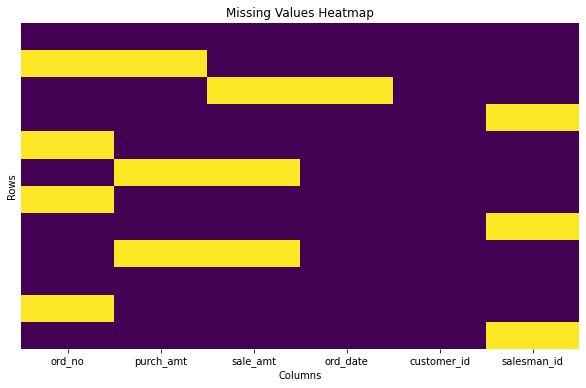

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a sample DataFrame with missing values
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df = pd.DataFrame(data)

# Create a DataFrame to represent missing values
missing_values = df.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap to show the missing values
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False, xticklabels=df.columns)

# Set labels and title
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()